# Face Detection and Blur for Privacy (OpenCV + Haar Cascade or DNN)

🔍 Detected 5 face(s)
❌ Cannot access webcam


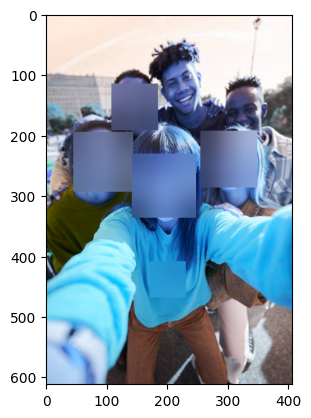

In [1]:
import cv2
import os
import matplotlib.pyplot as plt

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# Function to blur faces in a given image
def blur_faces(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    print(f"🔍 Detected {len(faces)} face(s)")

    for (x, y, w, h) in faces:
        roi = image[y:y+h, x:x+w]
        blurred_roi = cv2.GaussianBlur(roi, (99, 99), 30)
        image[y:y+h, x:x+w] = blurred_roi

    return image

# ----------- OPTION 1: PROCESS STATIC IMAGE -----------
img_path = "group.jpg"
if not os.path.exists(img_path):
    print(f"❌ Image not found: {img_path}")
    exit()

img = cv2.imread(img_path)
blurred_img = blur_faces(img)

plt.imshow(blurred_img)
cv2.imwrite("blurred_output.jpg", blurred_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# ----------- OPTION 2: PROCESS LIVE WEBCAM FEED -----------
def webcam_blur():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("❌ Cannot access webcam")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        blurred_frame = blur_faces(frame)
        cv2.imshow("Webcam Face Blur", blurred_frame)

        # Press 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


webcam_blur()


# Image Segmentation with GrabCut or Thresholding Techniques

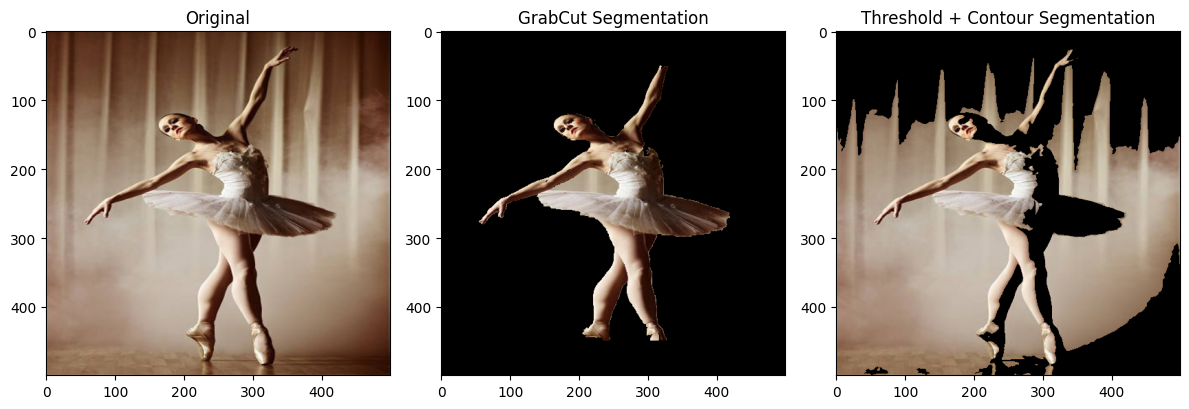

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_path = "IMAGE.jpg"  # Replace with your image
img = cv2.imread(image_path)

if img is None:
    print("❌ Image not found. Check the path.")
    exit()

# Resize for simplicity
img = cv2.resize(img, (500, 500))

# ----------- METHOD 1: GrabCut Segmentation -----------
mask = np.zeros(img.shape[:2], np.uint8)

# Background and foreground models (used internally by GrabCut)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Rectangle around the object (x, y, width, height)
rect = (50, 50, 400, 400)  # adjust for your image

# Apply GrabCut
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Where mask=2 or 0 -> background, 1 or 3 -> foreground
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
grabcut_output = img * mask2[:, :, np.newaxis]

# ----------- METHOD 2: Thresholding + Contours -----------
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_mask = np.zeros_like(gray)
cv2.drawContours(contour_mask, contours, -1, 255, -1)
contour_output = cv2.bitwise_and(img, img, mask=contour_mask)

# ----------- Plot Results Side-by-Side -----------
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(grabcut_output, cv2.COLOR_BGR2RGB))
plt.title("GrabCut Segmentation")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(contour_output, cv2.COLOR_BGR2RGB))
plt.title("Threshold + Contour Segmentation")

plt.tight_layout()
plt.show()


# Shi-Tomasi Corner Detection

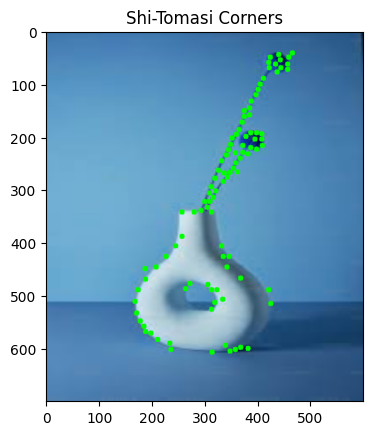

In [12]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("obj.jpeg")  # Replace with your image path
img = cv2.resize(img, (600, 700))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = corners.astype(int)  # Updated line to avoid AttributeError

# Draw corners
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 5, (0, 255, 0), -1)

# Show result
plt.imshow( img)
plt.title("Shi-Tomasi Corners")
cv2.waitKey(0)
cv2.destroyAllWindows()


### Conclusion:
- Through these three projects, I explored key areas of computer vision including face detection and anonymization, image segmentation, and feature detection using corner detection algorithms. I learned how to work with OpenCV’s powerful tools like Haar Cascades, GrabCut, stylization filters, and the Shi-Tomasi algorithm. These implementations helped me understand concepts such as region of interest (ROI), foreground extraction, and keypoint detection. Additionally, I gained practical experience in image processing, masking, filtering, and visualization. Overall, these projects strengthened my understanding of real-world computer vision applications and enhanced my ability to build privacy-aware and visually creative tools.

